# Energy Efficiency Predictor

### Dataset Information

This project utilizes the **Energy Efficiency Dataset** from the UCI Machine Learning Repository. The dataset contains information on the energy efficiency of buildings, with two main target variables:
- **Y1**: Heating Load
- **Y2**: Cooling Load

Each record in the dataset consists of various building parameters, such as relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution, which influence energy efficiency.

#### Dataset Link:
- [Energy Efficiency Dataset on UCI](https://archive.ics.uci.edu/dataset/242/energy+efficiency)

---

### Notebook Objectives

The objective of this notebook is to develop regression models to predict the heating load (Y1) and cooling load (Y2) based on building characteristics. This involves:
1. **Data Preprocessing**: Handling scaling, splitting, and feature engineering.
2. **Model Training and Hyperparameter Tuning**: Using ElasticNet regression with optimal hyperparameters for improved performance.
3. **Model Evaluation**: Assessing models using R² and MSE metrics and analyzing feature importance for each target variable.








In [93]:
import pandas as pd

# Read the .xlsx file
df = pd.read_excel('./Data/ENB2012_data.xlsx', engine='openpyxl')

# Display the first few rows of the DataFrame
print(df.head())


     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


***VARIABLES TABLE***



| Variable Name | Role   | Type      | Description             | Units | Missing Values |
|---------------|--------|-----------|-------------------------|-------|----------------|
| X1            | Feature| Continuous| Relative Compactness    |       | no             |
| X2            | Feature| Continuous| Surface Area            |       | no             |
| X3            | Feature| Continuous| Wall Area               |       | no             |
| X4            | Feature| Continuous| Roof Area               |       | no             |
| X5            | Feature| Continuous| Overall Height          |       | no             |
| X6            | Feature| Integer   | Orientation             |       | no             |
| X7            | Feature| Continuous| Glazing Area            |       | no             |
| X8            | Feature| Integer   | Glazing Area Distribution|      | no             |
| Y1            | Target | Continuous| Heating Load            |       | no             |
| Y2            | Target | Continuous| Cooling Load            |       | no             |

Missing values:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

Data types:
 X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

 

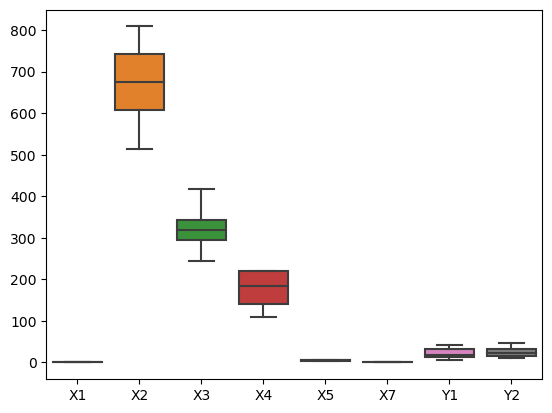

In [94]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Check for missing values
print("Missing values:\n", df.isnull().sum())

# 2. Validate data types
print("\nData types:\n", df.dtypes)

# 3. Outliers detection (boxplot for visual check)
sns.boxplot(data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'Y1', 'Y2']])

# 4. Remove duplicates
df = df.drop_duplicates()
#5. Describe
print(df.describe())

Y1 (Heating Load) and Y2 (Cooling Load) appear to be fairly consistent, with minimal spread and no visible outliers. This indicates that most buildings in the dataset have similar heating and cooling load requirements.

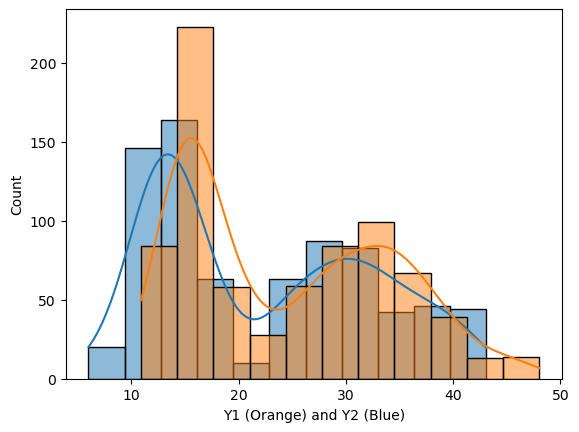

In [95]:
# 6. Check for data imbalance in target variables
import matplotlib.pyplot as plt
sns.histplot(df['Y1'], kde=True)
sns.histplot(df['Y2'], kde=True)
plt.xlabel('Y1 (Orange) and Y2 (Blue)')
plt.show()

The overlapping regions show where both heating and cooling loads have similar counts. This might indicate conditions where buildings require both moderate heating and cooling loads.

<Axes: >

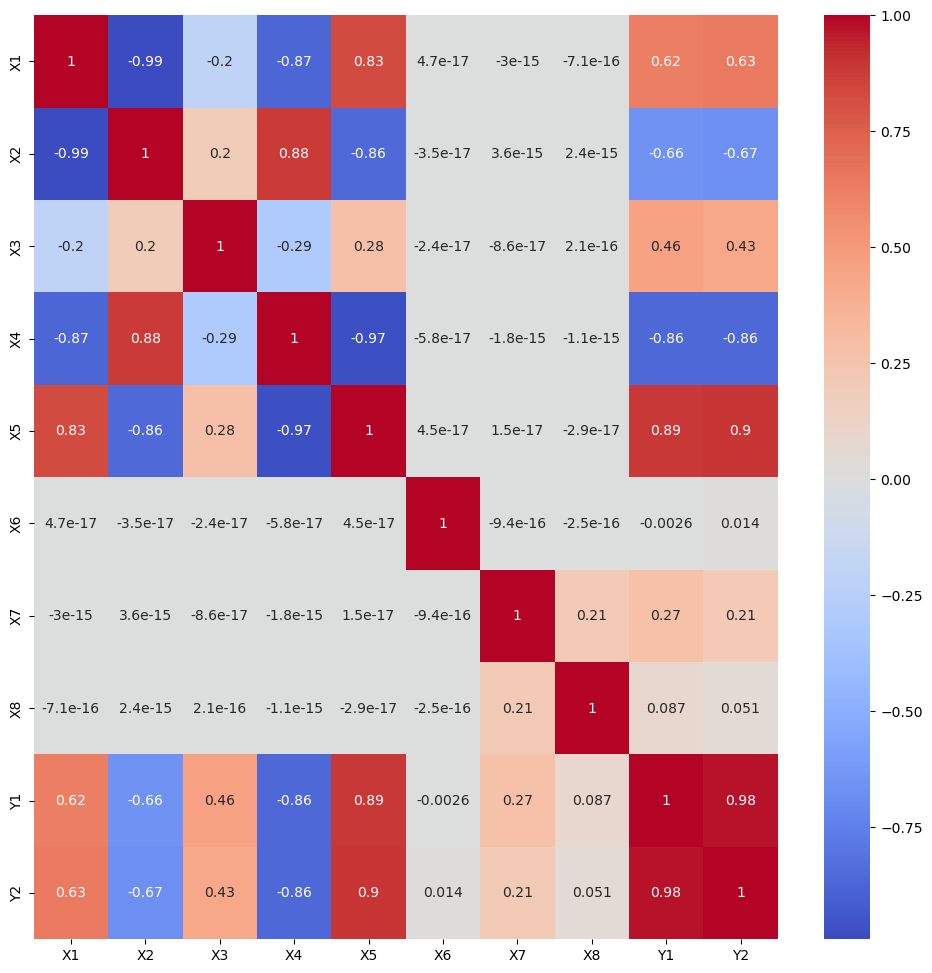

In [97]:
# 7. Check for multicollinearity
plt.figure(figsize=(12,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [98]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix 
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  4.678592e-17 -3.459372e-17 -2.429499e-17 -5.830058e-17  4.492205e-17   
X7 -2.960552e-15  3.636925e-15 -8.567455e-17 -1.759011e-15  1.489134e-17   
X8 -7.107006e-16  2.438409e-15  2.067384e-16 -1.078071e-15 -2.920613e-17   
Y1  6.222719e-01 -6.581199e-01  4.556714e-01 -8.618281e-01  8.894305e-01   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

              X6            X7            X8        Y1        Y2  
X1  4.678592e-17 -2.960552e-15 -7.107006e-16  0.622272  0.634339  
X2 -3.459

***The most impactful features on Y1 and Y2 are X5, X4, and X1:***

X5 ( Overall Height ) has the strongest positive impact.
X4 ( Roof Area ) has the strongest negative impact.
X1 (Relative Compactness ) also positively impacts both targets.


In [99]:
#Checking skewness
from scipy.stats import skew

skew_Y1 = skew(df['Y1'])
skew_Y2 = skew(df['Y2'])

print(f"Skewness of Y1: {skew_Y1}")
print(f"Skewness of Y2: {skew_Y2}")


Skewness of Y1: 0.3597412991314765
Skewness of Y2: 0.39521862418415704


### MODEL 


Elastic Net 

In [100]:
from sklearn.model_selection import train_test_split

# Define features (X) and combined targets (Y1, Y2)
X = df.drop(columns=['Y1', 'Y2'])  # Drop the target columns from the feature set
Y = df[['Y1', 'Y2']]  # Combine Y1 and Y2 into a single dataframe

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [101]:
X.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')

In [102]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Define the model and parameter grid for ElasticNet
elasticnet = ElasticNet()

param_grid = {
    'elasticnet__alpha': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 1]  # Mix ratio between Lasso and Ridge
}

# Set up the pipeline for ElasticNet with scaling
pipeline_en = Pipeline([
    ('scaler', StandardScaler()),  # Add a scaling step
    ('elasticnet', elasticnet)     # ElasticNet model
])

# Create GridSearchCV to search for best hyperparameters for ElasticNet
grid_search_en = GridSearchCV(pipeline_en, param_grid, cv=5, n_jobs=-1)

# Fit the model on Y1
grid_search_en.fit(X_train, Y_train['Y1'])

# Best hyperparameters for ElasticNet
print(f"Best ElasticNet hyperparameters for Y1: {grid_search_en.best_params_}")

# Evaluate the model on Y1
y1_pred = grid_search_en.predict(X_test)
r2_y1 = r2_score(Y_test['Y1'], y1_pred)
mse_y1 = mean_squared_error(Y_test['Y1'], y1_pred)

print(f"ElasticNet Regression Performance for Y1:")
print(f"R^2 score for Y1: {r2_y1}")
print(f"Mean Squared Error for Y1: {mse_y1}")

# Repeat the same for Y2
grid_search_en.fit(X_train, Y_train['Y2'])

# Best hyperparameters for ElasticNet
print(f"Best ElasticNet hyperparameters for Y2: {grid_search_en.best_params_}")

# Evaluate the model on Y2
y2_pred = grid_search_en.predict(X_test)
r2_y2 = r2_score(Y_test['Y2'], y2_pred)
mse_y2 = mean_squared_error(Y_test['Y2'], y2_pred)

print(f"ElasticNet Regression Performance for Y2:")
print(f"R^2 score for Y2: {r2_y2}")
print(f"Mean Squared Error for Y2: {mse_y2}")


Best ElasticNet hyperparameters for Y1: {'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.3}
ElasticNet Regression Performance for Y1:
R^2 score for Y1: 0.9119466116895677
Mean Squared Error for Y1: 9.178016809025332
Best ElasticNet hyperparameters for Y2: {'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.7}
ElasticNet Regression Performance for Y2:
R^2 score for Y2: 0.8931446093840593
Mean Squared Error for Y2: 9.900925237745723


C:\Users\Hala\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.146e+03, tolerance: 6.197e+00
  model = cd_fast.enet_coordinate_descent(


In [103]:
# Final ElasticNet model training using best hyperparameters
final_model_y1 = ElasticNet(alpha=0.001, l1_ratio=0.1)
final_model_y2 = ElasticNet(alpha=0.001, l1_ratio=0.1)

# Train final model on Y1
final_model_y1.fit(X_train, Y_train['Y1'])

# Train final model on Y2
final_model_y2.fit(X_train, Y_train['Y2'])


ElasticNet(alpha=0.001, l1_ratio=0.1)

In [104]:
# Predict on the test data for Y1
y1_pred_final = final_model_y1.predict(X_test)

# Predict on the test data for Y2
y2_pred_final = final_model_y2.predict(X_test)

# Calculate R² and MSE for Y1
r2_y1_final = r2_score(Y_test['Y1'], y1_pred_final)
mse_y1_final = mean_squared_error(Y_test['Y1'], y1_pred_final)

# Calculate R² and MSE for Y2
r2_y2_final = r2_score(Y_test['Y2'], y2_pred_final)
mse_y2_final = mean_squared_error(Y_test['Y2'], y2_pred_final)

# Print final model evaluation metrics
print(f"Final ElasticNet Model Performance for Y1:")
print(f"R² score for Y1: {r2_y1_final}")
print(f"Mean Squared Error for Y1: {mse_y1_final}")

print(f"Final ElasticNet Model Performance for Y2:")
print(f"R² score for Y2: {r2_y2_final}")
print(f"Mean Squared Error for Y2: {mse_y2_final}")


Final ElasticNet Model Performance for Y1:
R² score for Y1: 0.9076914521757894
Mean Squared Error for Y1: 9.621542337024966
Final ElasticNet Model Performance for Y2:
R² score for Y2: 0.8888327941519225
Mean Squared Error for Y2: 10.300446122993323


In [105]:
# Get coefficients for Y1 and Y2 models
coef_y1 = final_model_y1.coef_
coef_y2 = final_model_y2.coef_

# Create dataframes to view the coefficients for Y1 and Y2
coef_y1_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coef_y1
}).sort_values(by='Coefficient', ascending=False)

coef_y2_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coef_y2
}).sort_values(by='Coefficient', ascending=False)

# Print feature importance
print("Feature Importance for Y1 (ElasticNet):")
print(coef_y1_df)

print("Feature Importance for Y2 (ElasticNet):")
print(coef_y2_df)


Feature Importance for Y1 (ElasticNet):
  Feature  Coefficient
6      X7    19.260389
4      X5     5.252848
7      X8     0.233762
2      X3     0.038327
1      X2     0.006102
3      X4    -0.007408
5      X6    -0.023666
0      X1    -6.549255
Feature Importance for Y2 (ElasticNet):
  Feature  Coefficient
6      X7    14.189932
4      X5     5.346760
5      X6     0.063703
7      X8     0.052442
2      X3     0.023836
1      X2     0.009365
3      X4    -0.004602
0      X1    -7.508967


In [106]:
import joblib
# Save the models for Y1 and Y2
joblib.dump(final_model_y1, 'final_model_y1.pkl')
joblib.dump(final_model_y2, 'final_model_y2.pkl')


['final_model_y2.pkl']

In [107]:
import pandas as pd
df.to_csv('energy_efficiency_data.csv', index=False)


In [108]:


# Save the scaler to a file
joblib.dump(scaler, "scaler.pkl")
# Load the saved scaler
scaler = joblib.load("scaler.pkl")
final_model_y1 = joblib.load('final_model_y1.pkl')
final_model_y2 = joblib.load('final_model_y2.pkl')

In [124]:
def predict_heating_load(features):
    try:
        # Ensure that all columns expected by the model are numeric
        columns_to_check = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
        invalid_columns = []

        # Check if each column contains numeric values
        for column in columns_to_check:
            # Check if any value in the column is not numeric
            if not features[column].apply(pd.to_numeric, errors='coerce').notna().all():
                invalid_columns.append(column)

        # If there are invalid columns, raise a specific error message
        if invalid_columns:
            raise ValueError(f"Invalid input detected in the following columns: {', '.join(invalid_columns)}. Please ensure all values are numeric.")

        # Use the pipeline directly - no need for separate scaling
        return final_model_y1.predict(features)
    except Exception as e:
        return str(e)

def predict_cooling_load(features):
    try:
        # Ensure that all columns expected by the model are numeric
        columns_to_check = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
        invalid_columns = []

        # Check if each column contains numeric values
        for column in columns_to_check:
            # Check if any value in the column is not numeric
            if not features[column].apply(pd.to_numeric, errors='coerce').notna().all():
                invalid_columns.append(column)

        # If there are invalid columns, raise a specific error message
        if invalid_columns:
            raise ValueError(f"Invalid input detected in the following columns: {', '.join(invalid_columns)}. Please ensure all values are numeric.")

        # Use the pipeline directly - no need for separate scaling
        return final_model_y2.predict(features)
    except Exception as e:
        return str(e)


In [121]:
# Sample input data with 8 features
sample_data = pd.DataFrame({
    'X1': [10],
    'X2': [0],
    'X3': [30],
    'X4': ['hala'],
    'X5': [0],
    'X6': [60],
    'X7': [70],
    'X8': [80]
})

# Test the functions with sample data
heating_pred = predict_heating_load(sample_data)
cooling_pred = predict_cooling_load(sample_data)

print("Heating Load Prediction:", heating_pred)
print("Cooling Load Prediction:", cooling_pred)


Heating Load Prediction: Invalid input detected in the following columns: X4. Please ensure all values are numeric.
Cooling Load Prediction: Invalid input detected in the following columns: X4. Please ensure all values are numeric.


In [ ]:
*********************************************************************************************************************

In [122]:
pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/9a/14/857d0734989f3d26f2f965b2e3f67568ea7a6e8a60cb9c1ed7f774b6d606/streamlit-1.40.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/9b/52/4a86a4fa1cc2aae79137cc9510b7080c3e5aede2310d14fae5486feec7f7/altair-5.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/10/cb/f2ad4230dc2eb1a74edf38f1a38b9b52277f75bef262d8908e60d957e13c/blinker-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/a4/07/14f8ad37f2d12a5ce41206c21820d8cb6561b728e51fad4530dff0552a67/cachetools-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/e9/bd/cc3a402a6439c15c3d4294333e13042b915bbeab54edc4